# Part I - prosperLoanData
## by Habib Khair

## Introduction

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), Monthly Loan Payments, borrower income, Debt To Income Ratio ,Employment Status, Monthly Income and more .

## Preliminary Wrangling

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#load the dataset 
df = pd.read_csv('prosperLoanData.csv')

In [5]:
df.shape

(113937, 81)

In [9]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

>I will be working with dataset that contains 113,937 loans with 12 variables, I am interested in those variables including Loan original amount, monthly loan payments, Employmnet Status, Term , debt to income ratio, Stated monthly income, Borrow rate , Borrow APR , listing number , listing creation date , loan status currently in group , income range.

### What is/are the main feature(s) of interest in your dataset?

> I am interested to figure out how monthly loan payment , borrower interest , borrower APR and monthly income affects Loan Orginal amount .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think Borrow rate/ARP , monthly income and employment status will have impact on the Loan amount.

# Data Cleaning

In [15]:
#Creat new data frame for the needed columns only
loan = df[['ListingNumber','ListingCreationDate','Term','LoanStatus','BorrowerAPR','BorrowerRate','EmploymentStatus','MonthlyLoanPayment',
           'CurrentlyInGroup','DebtToIncomeRatio','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount']].copy()


In [17]:
#check if there is missing values
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingNumber        113937 non-null  int64  
 1   ListingCreationDate  113937 non-null  object 
 2   Term                 113937 non-null  int64  
 3   LoanStatus           113937 non-null  object 
 4   BorrowerAPR          113912 non-null  float64
 5   BorrowerRate         113937 non-null  float64
 6   EmploymentStatus     111682 non-null  object 
 7   MonthlyLoanPayment   113937 non-null  float64
 8   CurrentlyInGroup     113937 non-null  bool   
 9   DebtToIncomeRatio    105383 non-null  float64
 10  IncomeRange          113937 non-null  object 
 11  StatedMonthlyIncome  113937 non-null  float64
 12  LoanOriginalAmount   113937 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 10.5+ MB


In [19]:
#checking first 10 rows of the dataset 
loan.head(10)

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,MonthlyLoanPayment,CurrentlyInGroup,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,Self-employed,330.43,True,0.17,"$25,000-49,999",3083.333333,9425
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,Employed,318.93,False,0.18,"$50,000-74,999",6125.000000,10000
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,Not available,123.32,True,0.06,Not displayed,2083.333333,3001
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,Employed,321.45,False,0.15,"$25,000-49,999",2875.000000,10000
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,Employed,563.97,False,0.26,"$100,000+",9583.333333,15000
5,1074836,2013-12-14 08:26:37.093000000,60,Current,0.15425,0.1314,Employed,342.37,False,0.36,"$100,000+",8333.333333,15000
6,750899,2013-04-12 09:52:56.147000000,36,Current,0.31032,0.2712,Employed,122.67,False,0.27,"$25,000-49,999",2083.333333,3000
7,768193,2013-05-05 06:49:27.493000000,36,Current,0.23939,0.2019,Employed,372.60,False,0.24,"$25,000-49,999",3355.750000,10000
8,1023355,2013-12-02 10:43:39.117000000,36,Current,0.07620,0.0629,Employed,305.54,False,0.25,"$25,000-49,999",3333.333333,10000
9,1023355,2013-12-02 10:43:39.117000000,36,Current,0.07620,0.0629,Employed,305.54,False,0.25,"$25,000-49,999",3333.333333,10000


In [21]:
#Fill missing value from DebtToIncomeRatio column
for index in range(len(loan)):
    if pd.isna(loan.at[index, 'DebtToIncomeRatio']):
        loan.at[index, 'DebtToIncomeRatio'] =  loan['DebtToIncomeRatio'].mean() 


In [22]:
#Check if still there missing values
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingNumber        113937 non-null  int64  
 1   ListingCreationDate  113937 non-null  object 
 2   Term                 113937 non-null  int64  
 3   LoanStatus           113937 non-null  object 
 4   BorrowerAPR          113912 non-null  float64
 5   BorrowerRate         113937 non-null  float64
 6   EmploymentStatus     111682 non-null  object 
 7   MonthlyLoanPayment   113937 non-null  float64
 8   CurrentlyInGroup     113937 non-null  bool   
 9   DebtToIncomeRatio    113937 non-null  float64
 10  IncomeRange          113937 non-null  object 
 11  StatedMonthlyIncome  113937 non-null  float64
 12  LoanOriginalAmount   113937 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 10.5+ MB


In [23]:
#fixing missing values from EmploymentStatus column
for index in range(len(loan)):
    if pd.isna(loan.at[index, 'EmploymentStatus']):
        loan.at[index, 'EmploymentStatus'] =  'Unknown'

In [24]:
#check if there missing values 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingNumber        113937 non-null  int64  
 1   ListingCreationDate  113937 non-null  object 
 2   Term                 113937 non-null  int64  
 3   LoanStatus           113937 non-null  object 
 4   BorrowerAPR          113912 non-null  float64
 5   BorrowerRate         113937 non-null  float64
 6   EmploymentStatus     113937 non-null  object 
 7   MonthlyLoanPayment   113937 non-null  float64
 8   CurrentlyInGroup     113937 non-null  bool   
 9   DebtToIncomeRatio    113937 non-null  float64
 10  IncomeRange          113937 non-null  object 
 11  StatedMonthlyIncome  113937 non-null  float64
 12  LoanOriginalAmount   113937 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 10.5+ MB


In [25]:
#exploring random sample from the dataset
loan.sample(10)

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,MonthlyLoanPayment,CurrentlyInGroup,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
110491,800842,2013-06-07 03:16:08.263000000,36,Current,0.28780,0.2492,Employed,198.59,False,0.04,"$50,000-74,999",5804.583333,5000
93293,996760,2013-11-15 12:19:46.173000000,36,Current,0.26917,0.2310,Employed,387.62,False,0.47,"$25,000-49,999",3741.666667,10000
88,538785,2011-11-13 20:05:58.260000000,36,Completed,0.35643,0.3199,Employed,174.20,False,0.23,"$75,000-99,999",6250.000000,4000
91799,448552,2010-03-01 12:32:09.327000000,36,Completed,0.37453,0.3500,Full-time,271.42,False,0.25,"$75,000-99,999",7083.333333,6000
52384,1092583,2014-01-07 16:53:10.197000000,36,Current,0.18633,0.1500,Other,294.66,False,0.58,"$25,000-49,999",2666.666667,8500
86953,452547,2010-04-03 21:45:32.023000000,36,Completed,0.08341,0.0800,Full-time,155.52,False,0.22,"$50,000-74,999",4500.000000,5000
65001,377951,2008-08-04 21:44:10.023000000,36,Completed,0.15428,0.1400,Full-time,341.78,False,0.10,"$75,000-99,999",7083.333333,10000
56383,417113,2009-07-18 15:04:17.993000000,36,Completed,0.13889,0.1176,Full-time,122.47,False,0.29,"$25,000-49,999",2108.750000,3700
58421,952603,2013-10-21 13:30:59.170000000,60,Current,0.18965,0.1660,Employed,369.57,False,0.27,"$50,000-74,999",4286.750000,15000
35185,369571,2008-07-18 10:31:44.203000000,36,Defaulted,0.37453,0.3500,Full-time,316.65,False,0.29,"$50,000-74,999",5166.666667,7000


## Univariate Exploration

# What is the distribution of different employment statuses in the dataset?

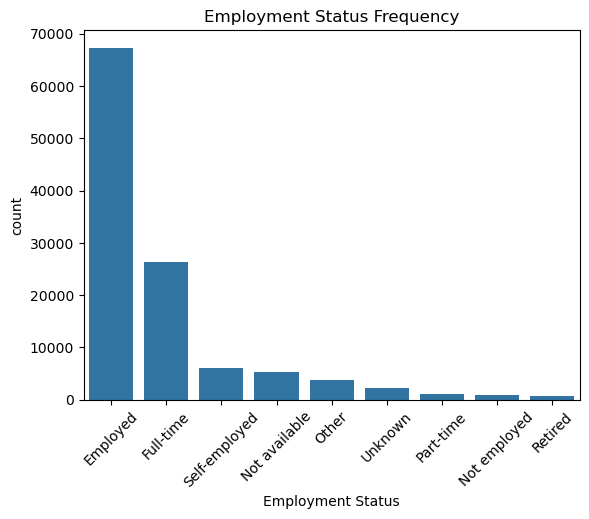

In [28]:
# Plot the Employment Status 
type_order = loan['EmploymentStatus'].value_counts().index
sns.countplot(data=loan, x='EmploymentStatus', color="tab:blue", order=type_order);
plt.xticks(rotation = 45);
plt.xlabel('Employment Status');
plt.title('Employment Status Frequency');

##### Most loan borrowers are “Employed” and “Full-Time” .

# How is the debt-to-income (DTI) ratio distributed among borrowers?

In [137]:

def myhistplot(data, x, bin_width, percentile=1.0, title='Histogram'):
    # Define bins based on bin width
    in_bins = np.arange(data[x].min(), data[x].max() + bin_width, bin_width)
    
    # Create a figure with larger size
    plt.figure(figsize=(16, 8))  # Increased figure size
    
    # Plot histogram
    plt.hist(data[x], bins=in_bins, edgecolor='black', alpha=0.7)
    
    # Set x-axis limits
    plt.xlim(0, 1)
    
    # Adjust y-axis limit to show full data
    y_max = np.histogram(data[x], bins=in_bins)[0].max()  # Get max frequency
    plt.ylim(0, y_max + 500)  # Add some space above max frequency for better visibility
    
    # Label axes and title
    plt.xlabel(x, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(title, fontsize=16)

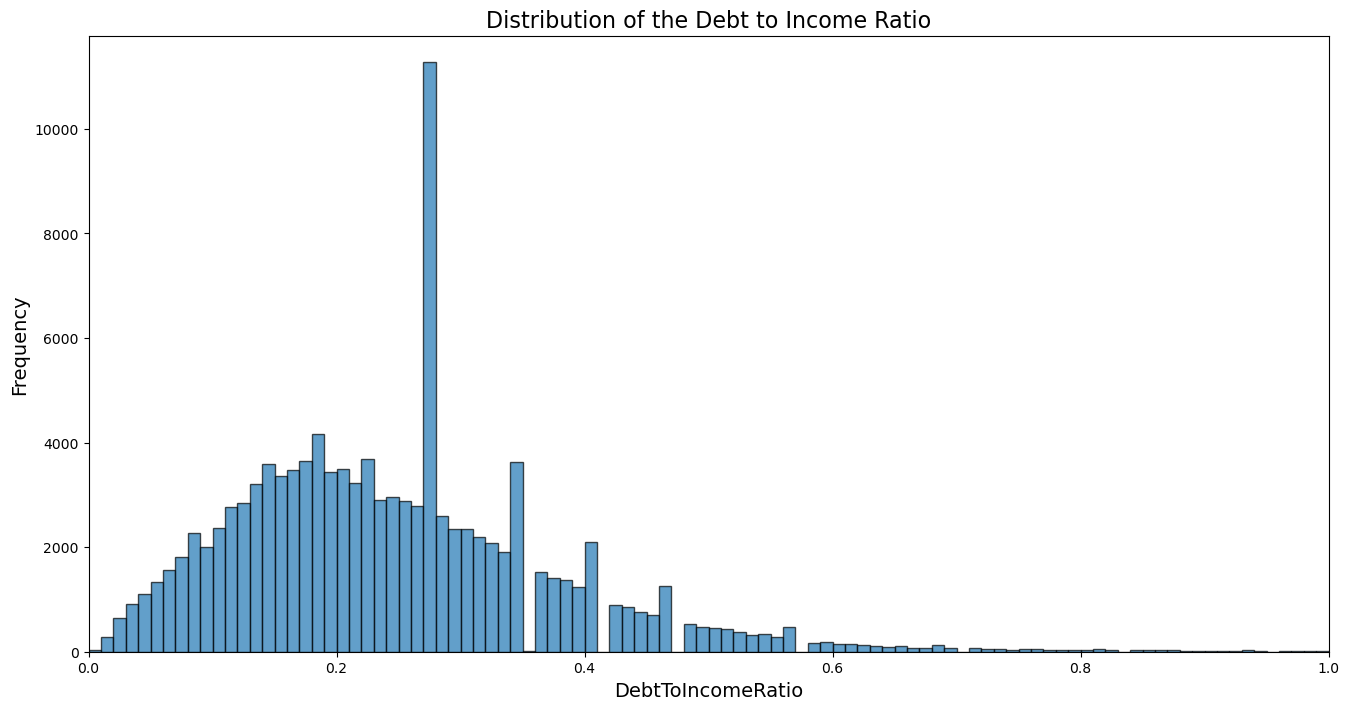

In [139]:
# Call the function
myhistplot(data=loan, x='DebtToIncomeRatio', bin_width=0.01, percentile=1.0, 
           title='Distribution of the Debt to Income Ratio')

##### The distribution is right-skewed, meaning most borrowers have relatively low DTI ratios, but some have significantly higher ones. There is a noticeable spike around 0.2 (20%), indicating a common threshold among borrowers

# How are monthly loan payments distributed among borrowers?

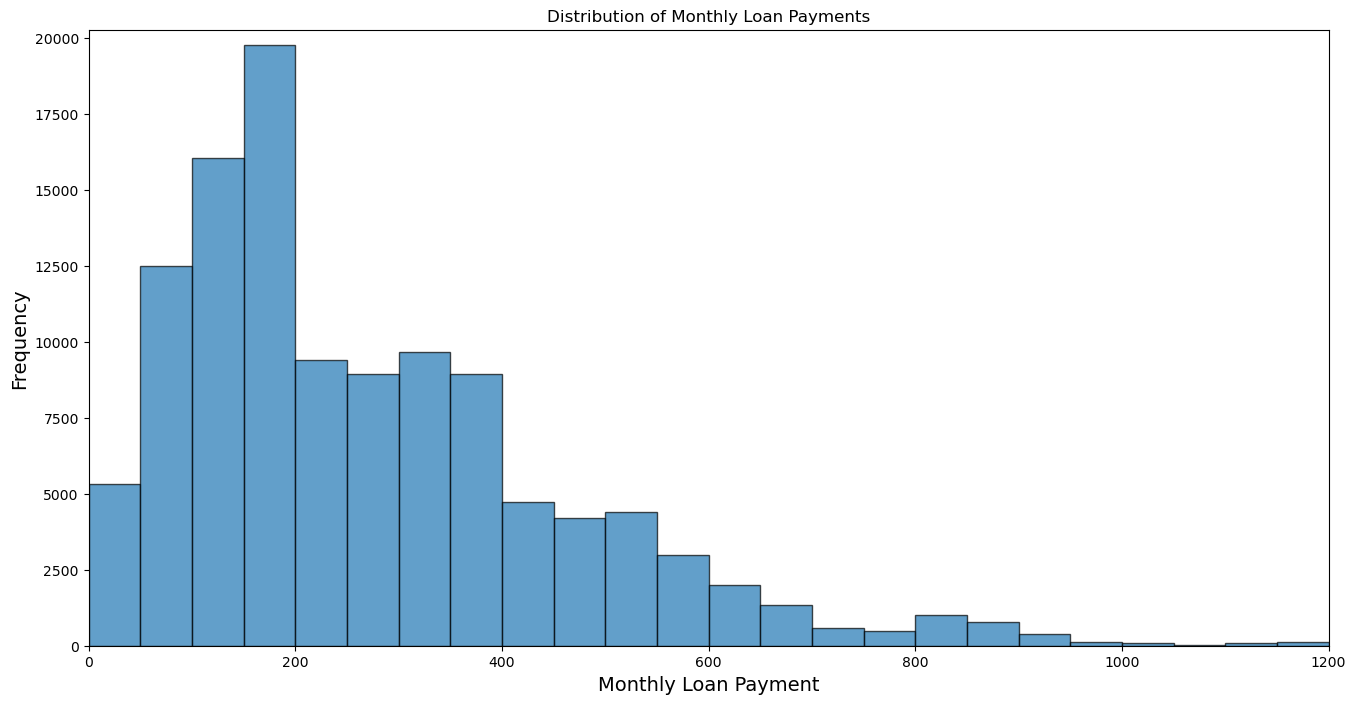

In [179]:
# Create histogram for monthly payments
myhistplot(data=loan, x='MonthlyLoanPayment', bin_width=50, percentile=1.0, title='Distribution of Monthly Loan Payments')

# Set x-axis limit
plt.xlim(0, 1200)

# Add axis labels and title
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Loan Payments');

##### The distribution is right-skewed, meaning most borrowers have lower monthly payments, with the frequency decreasing as payment amounts increase, Also The highest frequency occurs around $100-$200, indicating that most loans fall within this range.

# what ratios do borrowers pay annualy ?

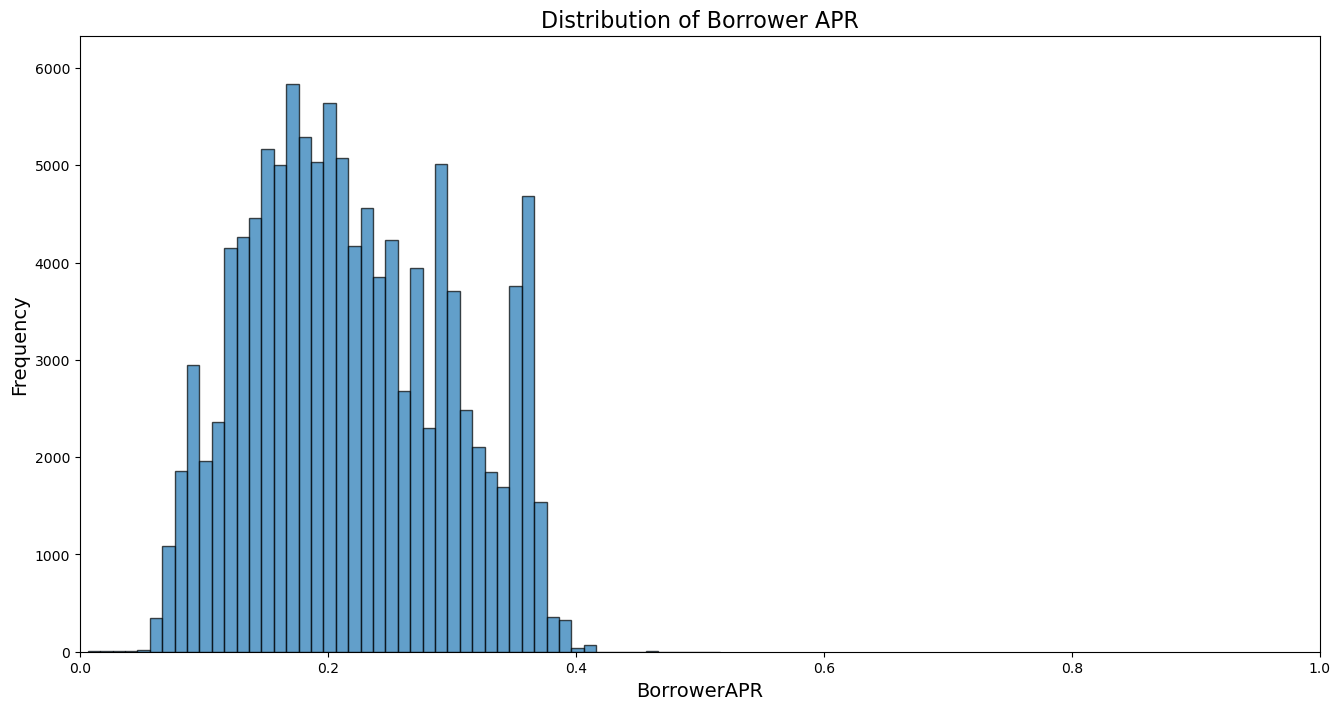

In [173]:
myhistplot(data=loan, x='BorrowerAPR', bin_width=0.01, percentile=1.0, title='Distribution of Borrower APR')

##### Most Borrowers pay between 0.1 to 0.2 annually

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The majority of loan borrowers are “Employed” and work “Full-Time,” which is the most common employment status in the dataset. The Debt-to-Income Ratio showed a strong influence from individuals with high incomes relative to their debt, which skewed the distribution. Most monthly payments fall within the 100–200 range, indicating a common repayment pattern among borrowers. Additionally, the majority of borrowers tend to make annual payments between 0.1 and 0.2 of their total loan amount. No major transformations were required, but the impact of high-income individuals on the Debt-to-Income Ratio was notable.


There isn't need to implement any transformations.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No tidying, adjustment or change was done to any of the variables of interest.

## Bivariate Exploration

# What's the relation between Loan Original Amount and Monthly Loan Payment? 

Text(0, 0.5, 'Monthly Loan Payment')

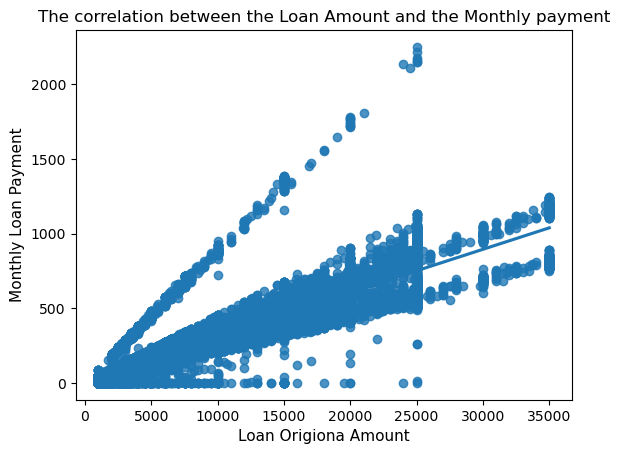

In [96]:
sns.regplot(data = loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment',  color="tab:blue")
plt.title('The correlation between the Loan Amount and the Monthly payment')
plt.xlabel('Loan Origiona Amount', fontsize=11)
plt.ylabel('Monthly Loan Payment', fontsize=11)              

##### there is a positive correlation between the monthly payment and the loan amount

# What is the relationship between monthly income and loan status? 

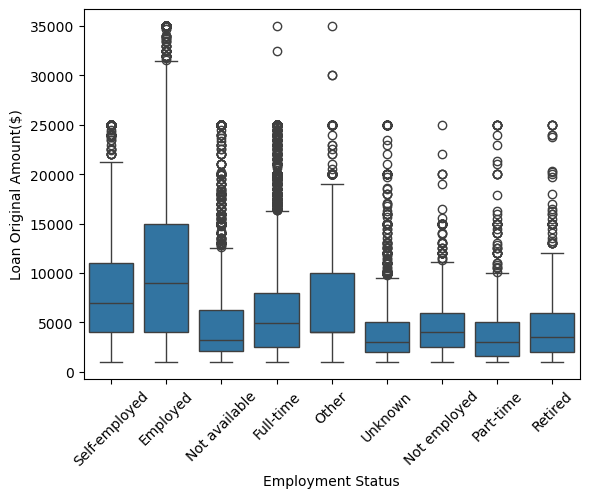

In [99]:
sns.boxplot(data=loan, y='LoanOriginalAmount', x='EmploymentStatus', color="tab:blue") #create boxplot using seaborn
plt.xticks(rotation=45)
plt.ylabel('Loan Original Amount($)')
plt.xlabel('Employment Status');                    

#####  employed borrowers accessed higher loans sizes than the other borrowers 

# What is the correlation between loan Orginal amount and the borrower Annual Percentage Rate ? 

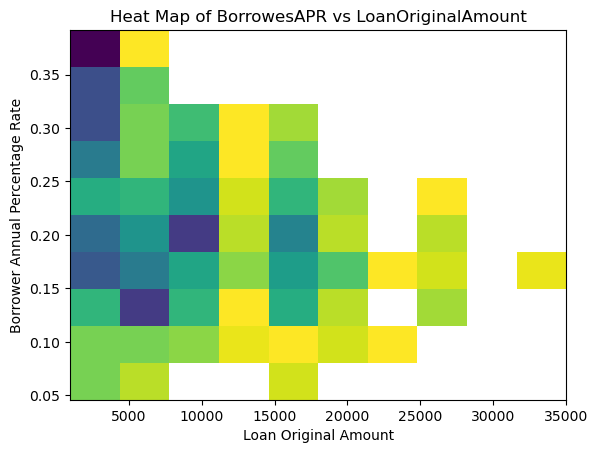

In [102]:
# Choose 500 random observations from the loan dataset
loan_sample = loan.sample(500)
plt.hist2d(data=loan_sample,  y='BorrowerAPR', x='LoanOriginalAmount', cmap='viridis_r', cmin=0.5) #creating a heatmap
plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Loan Original Amount')
plt.title('Heat Map of BorrowesAPR vs LoanOriginalAmount');


##### There is a Negative correlation between the loan Orginal amount and the borrower interet Rate .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>From this investigation, I observed that larger loan amounts tend to result in higher monthly payments, which is expected since a larger loan would require larger payments to cover interest. Also, employed borrowers were able to access higher loan amounts compared to unemployed borrowers, Due to the stability and predictability of their income. Also I found that there is a negative correlation between the loan amount and the borrower interest rate, suggesting that borrowers taking out larger loans generally receive lower interest rates, possibly because they are considered less risky or have better credit profiles.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed that borrowers with higher credit scores were generally more likely to have lower interest rates, which means that a good credit score is an indicator of financial stability and lower risk for lenders. I also found that the loan term seemed to affect the monthly payment: longer loan terms generally resulted in smaller monthly payments, though borrowers end up paying more interest over time. These secondary relationships highlight how factors like creditworthiness and loan duration play a significant role in determining loan conditions.

## Multivariate Exploration

# How does Borrower APR change with increasing loan amounts in case of each term? 


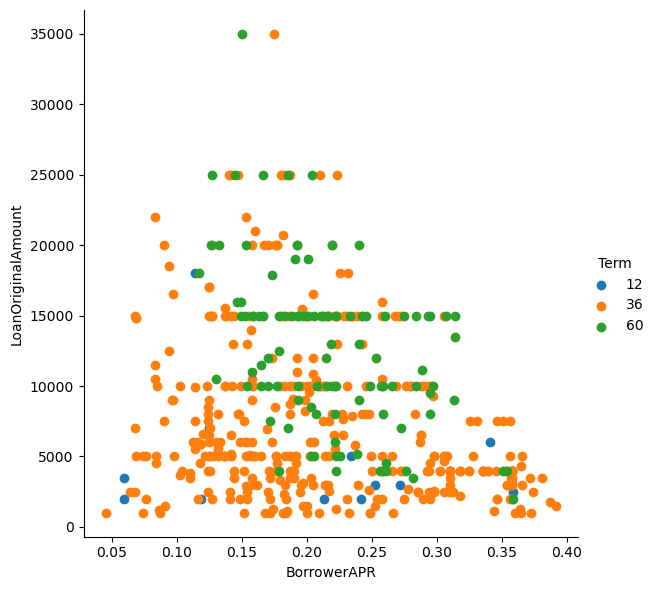

In [106]:
#Creating a scatter plot faced grid for multivariate variables of BorrowerAPR, LoanOriginalAmount and Term with Term as color encoding
g = sns.FacetGrid(data = loan_sample, hue = 'Term', height = 6)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount')
g.add_legend();                                                   

##### The data shows that borrowers with larger loan amounts tend to get lower APRs, likely because they have better credit profiles. Shorter-term loans (12 months) are less common and usually come with smaller loan amounts and higher APRs, while longer-term loans (60 months) are more frequent for larger amounts with lower rates. 

# How does loan status impact the relationship between loan amount and monthly payment ?

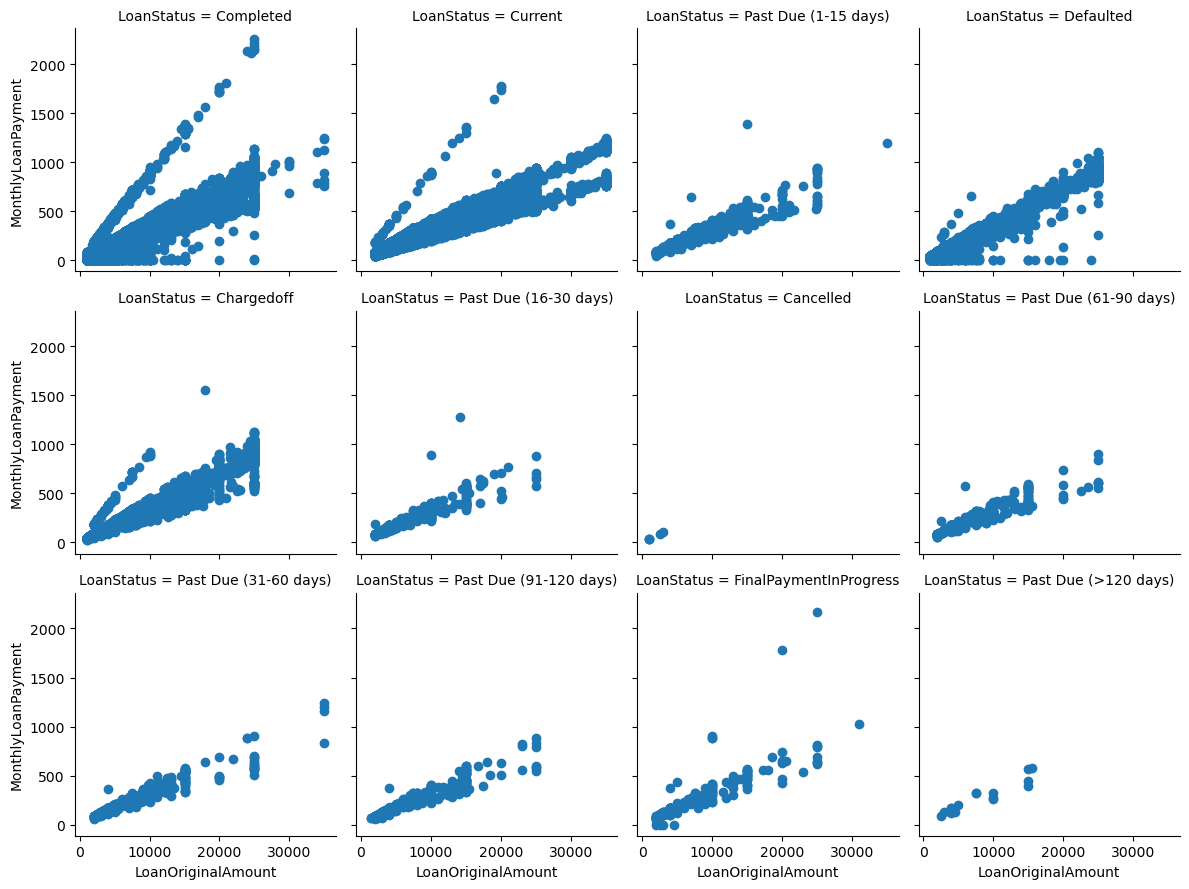

In [108]:
f = sns.FacetGrid(data=loan, col='LoanStatus', col_wrap=4) #creating four columns using LoanStatus per column
f.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')  

#### higher loan amounts come with higher monthly payments.Smaller loans seem more likely to be overdue, while larger loans are more often paid on time, possibly due to better borrower credit profiles.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationships observed in the data suggest that higher loan amounts are associated with higher monthly payments and better repayment behavior, likely due to stronger borrower credit profiles. Also, smaller loans tend to have a higher risk of being overdue, which may reflect weaker creditworthiness. At the same time, larger loans come with lower APRs, further emphasizing the link between credit profiles and loan terms. The loan term also plays a role, with shorter-term loans (12 months) typically having higher APRs and smaller amounts, while longer-term loans (60 months) are more common for larger loans with lower rates. These features seem to strengthen each other, providing a clearer picture of loan dynamics and borrower behavior.

### Were there any interesting or surprising interactions between features?

> The relationship between loan amount and APR—larger loans tend to come with lower APRs, likely due to borrowers with stronger credit profiles. Another interesting interaction was between loan term and APR, where shorter-term loans had higher APRs and smaller amounts, while longer-term loans were more common for larger amounts with lower rates. These interactions reveal a more nuanced picture of how loan terms and borrower characteristics influence each other.

## Conclusions
-  full-time employees borrowers larger loans.
 - High-income borrowers have better ratios.
 - Most monthly payments are in the 100–200 range.
 - Borrowers make payments between 0.1–0.2 of total loan amount.
 - Loan Amount vs. Monthly Payment: Larger loans = higher monthly payments.
 - Loan Amount vs. APR: Larger loans tend to have lower APRs.
 - Credit Score vs. APR: Higher credit scores = lower APRs.
 - Loan Term vs. Monthly Payment: Longer terms = smaller monthly payments, more interest.
 - Loan Size vs. Repayment Behavior: Larger loans are more likely to be paid on time.
 - Loan Term vs. APR: Shorter terms = higher APRs; longer terms = lower APRs.

In [82]:
#save the cleaned dataset 
loan.to_csv('loan.csv')